In [1]:
import numpy as np

# Specify the file paths
# file_path1 = "CIFAR10/labels.npy"
file_path2 = "CIFAR10/test_labels.npy"
file_path3 = "CIFAR10/train_labels.npy"

# Load the npy files
# labels = np.load(file_path1)
test_labels = np.load(file_path2)
train_labels = np.load(file_path3)

# Print the shapes of the loaded data
# print(f"Shape of data in {file_path1}: {data1.shape}")
print(f"Shape of data in {file_path2}: {test_labels.shape}")
print(f"Shape of data in {file_path3}: {train_labels.shape}")

# If you want to compare lengths instead of shapes, you can use len() function
# print(f"Length of data in {file_path1}: {len(data1)}")
print(f"Length of data in {file_path2}: {len(test_labels)}")
print(f"Length of data in {file_path3}: {len(train_labels)}")

Shape of data in CIFAR10/test_labels.npy: (10000,)
Shape of data in CIFAR10/train_labels.npy: (50000,)
Length of data in CIFAR10/test_labels.npy: 10000
Length of data in CIFAR10/train_labels.npy: 50000


In [2]:
import os
from PIL import Image
import numpy as np

# Specify the directory
dir_path = "CIFAR10/CIFAR10/Train"
dir_path2 = "CIFAR10/CIFAR10/Test"

# List the files in the directory
train_files = sorted(os.listdir(dir_path), key=lambda x: int(x.split('.')[0]))
test_files = sorted(os.listdir(dir_path2), key=lambda x: int(x.split('.')[0]))

# Load the images
train_images = np.array([np.array(Image.open(os.path.join(dir_path, file))) for file in train_files])
test_images = np.array([np.array(Image.open(os.path.join(dir_path2, file))) for file in test_files])

In [59]:
# Specify the directory
dir_path11 = "CIFAR10/D1/L1"
dir_path12 = "CIFAR10/D1/L2"
dir_path21 = "CIFAR10/D2/L1"
dir_path22 = "CIFAR10/D2/L2"
dir_path31 = "CIFAR10/D3/L1"
dir_path32 = "CIFAR10/D3/L2"
dir_path41 = "CIFAR10/D4/L1"
dir_path42 = "CIFAR10/D4/L2"

def load_files(dir_path):
    files = sorted(os.listdir(dir_path), key=lambda x: int(x.split('.')[0]))
    images = np.array([np.array(Image.open(os.path.join(dir_path, file))) for file in files])
    images = images.astype("float32") / 255.0
    return images


# Load the images from directories give proper names for the test images
d1_l1_test_images = load_files(dir_path11)
d1_l2_test_images = load_files(dir_path12)
d2_l1_test_images = load_files(dir_path21)
d2_l2_test_images = load_files(dir_path22)
d3_l1_test_images = load_files(dir_path31)
d3_l2_test_images = load_files(dir_path32)
d4_l1_test_images = load_files(dir_path41)
d4_l2_test_images = load_files(dir_path42)

In [3]:
len(train_images), len(test_images)
print(train_images[0].shape)

(32, 32, 3)


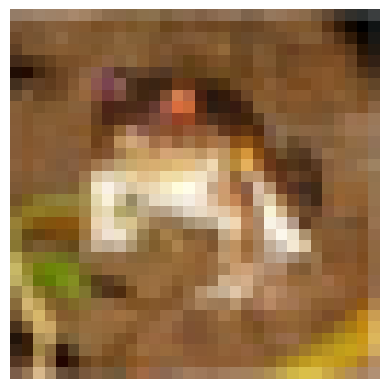

In [4]:
import matplotlib.pyplot as plt

# Load the image
image = train_images[0]

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()


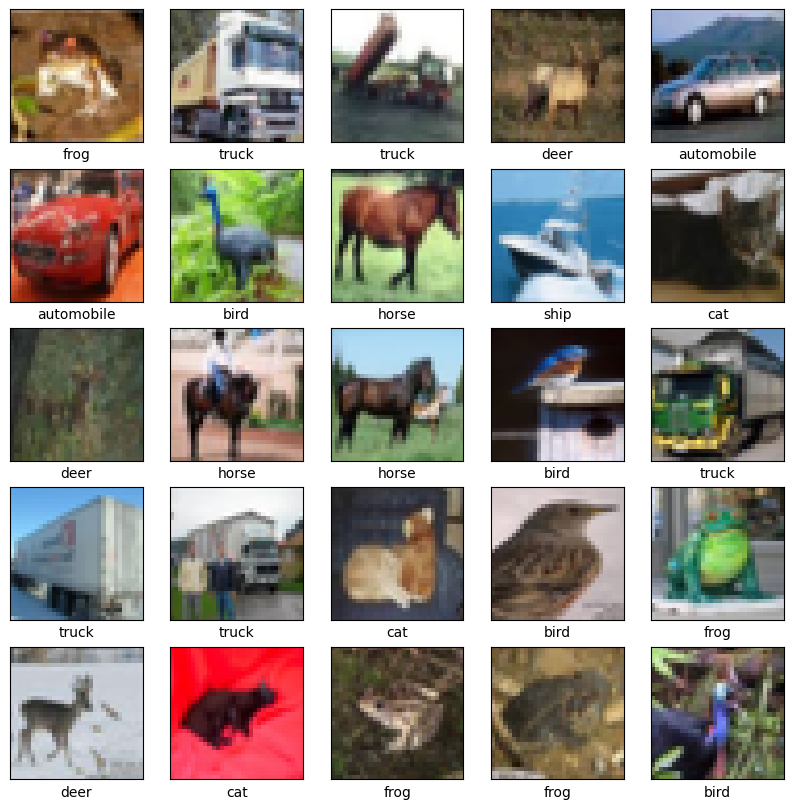

In [5]:
import matplotlib.pyplot as plt

# Define the label names
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(label_names[train_labels[i]])
plt.show()

In [6]:
train_images.shape
test_images.shape
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


In [7]:
# Normalize pixel values between 0 and 1
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

In [8]:
train_images[0].shape

(32, 32, 3)

In [9]:
# One hot encode the labels
from tensorflow.keras.utils import to_categorical
# One-hot encode the train labels
train_labels_encoded = to_categorical(train_labels)

# One-hot encode the test labels
test_labels_encoded = to_categorical(test_labels)

print(test_labels_encoded[0])


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [20]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


model = keras.Sequential([
    layers.Conv2D(64, (3, 3), padding='same', activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding='same', activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3, 3), padding='same', activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), padding='same', activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10)
])

# Create an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

# Train the model
history = model.fit(train_images, train_labels_encoded, epochs=27, validation_data=(test_images, test_labels_encoded), callbacks=[early_stopping])

/Users/matthewdulcich/Documents/DevProjects/Machine Learning Projects/Data-Drift/python311_venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/27
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 62ms/step - accuracy: 0.2825 - loss: 2.5271 - val_accuracy: 0.4640 - val_loss: 1.5312
Epoch 2/27
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.4727 - loss: 1.5882 - val_accuracy: 0.5708 - val_loss: 1.2386
Epoch 3/27
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.5586 - loss: 1.2668 - val_accuracy: 0.6002 - val_loss: 1.1500
Epoch 4/27
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.6238 - loss: 1.0810 - val_accuracy: 0.7065 - val_loss: 0.8241
Epoch 5/27
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.6761 - loss: 0.9332 - val_accuracy: 0.7048 - val_loss: 0.8466
Epoch 6/27
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.7069 - loss: 0.8432 - val_accuracy: 0.7475 - val_loss: 0.7255
Epoch 7/27
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.7356 - loss: 0.7567 - val_accuracy: 0.7767 - val_loss: 0.6502
Epoch 8/27
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.7660 

In [21]:
model.save_weights("original2CIFAR10.weights.h5")

In [73]:
model.save("originalModel2CIFAR10.h5")

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict the classes
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(test_labels, y_pred_classes, average='macro')
recall = recall_score(test_labels, y_pred_classes, average='macro')
f1 = f1_score(test_labels, y_pred_classes, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Precision: 0.8566140775283342
Recall: 0.8558
F1 Score: 0.8551897246711653


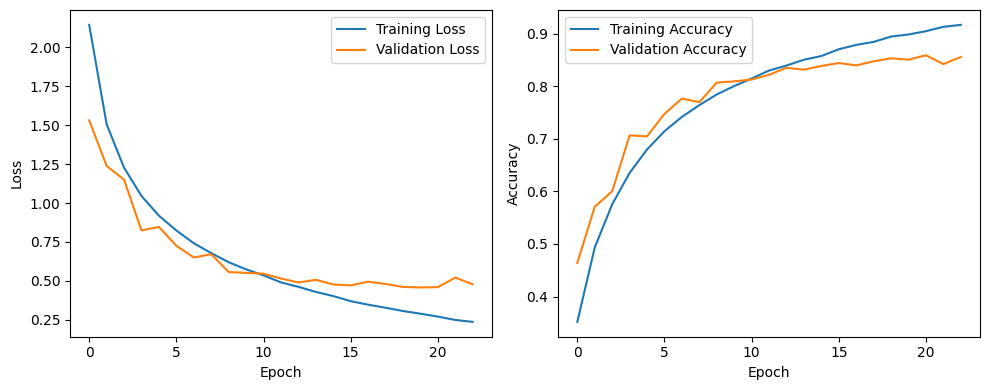

In [23]:
import matplotlib.pyplot as plt

# Get the history of accuracy and loss
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a new figure
plt.figure(figsize=(10, 4))

# Plot the loss
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot number 1
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot number 2
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the figure
plt.tight_layout()
plt.show()

In [60]:
def evaluate_model(model, test_images, test_labels_encoded):
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_images, test_labels_encoded, verbose=2)
    print(f"Test accuracy: {test_accuracy}"
          f"Test loss: {test_loss}")


# Run evalueate model for all these 
# d1_l1_test_images = load_files(dir_path11)
# d1_l2_test_images = load_files(dir_path12)
# d2_l1_test_images = load_files(dir_path21)
# d2_l2_test_images = load_files(dir_path22)
# d3_l1_test_images = load_files(dir_path31)
# d3_l2_test_images = load_files(dir_path32)
# d4_l1_test_images = load_files(dir_path41)
# d4_l2_test_images = load_files(dir_path42)

evaluate_model(model, d1_l1_test_images, test_labels_encoded)
evaluate_model(model, d1_l2_test_images, test_labels_encoded)
evaluate_model(model, d2_l1_test_images, test_labels_encoded)
evaluate_model(model, d2_l2_test_images, test_labels_encoded)
evaluate_model(model, d2_l1_test_images, test_labels_encoded)
evaluate_model(model, d3_l2_test_images, test_labels_encoded)
evaluate_model(model, d4_l1_test_images, test_labels_encoded)
evaluate_model(model, d4_l2_test_images, test_labels_encoded)


313/313 - 6s - 18ms/step - accuracy: 0.8535 - loss: 0.4862
Test accuracy: 0.8535000085830688Test loss: 0.486208975315094
313/313 - 5s - 15ms/step - accuracy: 0.8019 - loss: 0.6616
Test accuracy: 0.8019000291824341Test loss: 0.6616209149360657
313/313 - 5s - 15ms/step - accuracy: 0.2586 - loss: 4.3605
Test accuracy: 0.25859999656677246Test loss: 4.360529899597168
313/313 - 5s - 15ms/step - accuracy: 0.7019 - loss: 1.1195
Test accuracy: 0.7019000053405762Test loss: 1.1194674968719482
313/313 - 5s - 15ms/step - accuracy: 0.2586 - loss: 4.3605
Test accuracy: 0.25859999656677246Test loss: 4.360529899597168
313/313 - 5s - 16ms/step - accuracy: 0.8010 - loss: 0.6658
Test accuracy: 0.8009999990463257Test loss: 0.6658107042312622
313/313 - 5s - 16ms/step - accuracy: 0.8548 - loss: 0.4803
Test accuracy: 0.8547999858856201Test loss: 0.48025885224342346
313/313 - 5s - 15ms/step - accuracy: 0.5908 - loss: 1.5667
Test accuracy: 0.5907999873161316Test loss: 1.5667098760604858


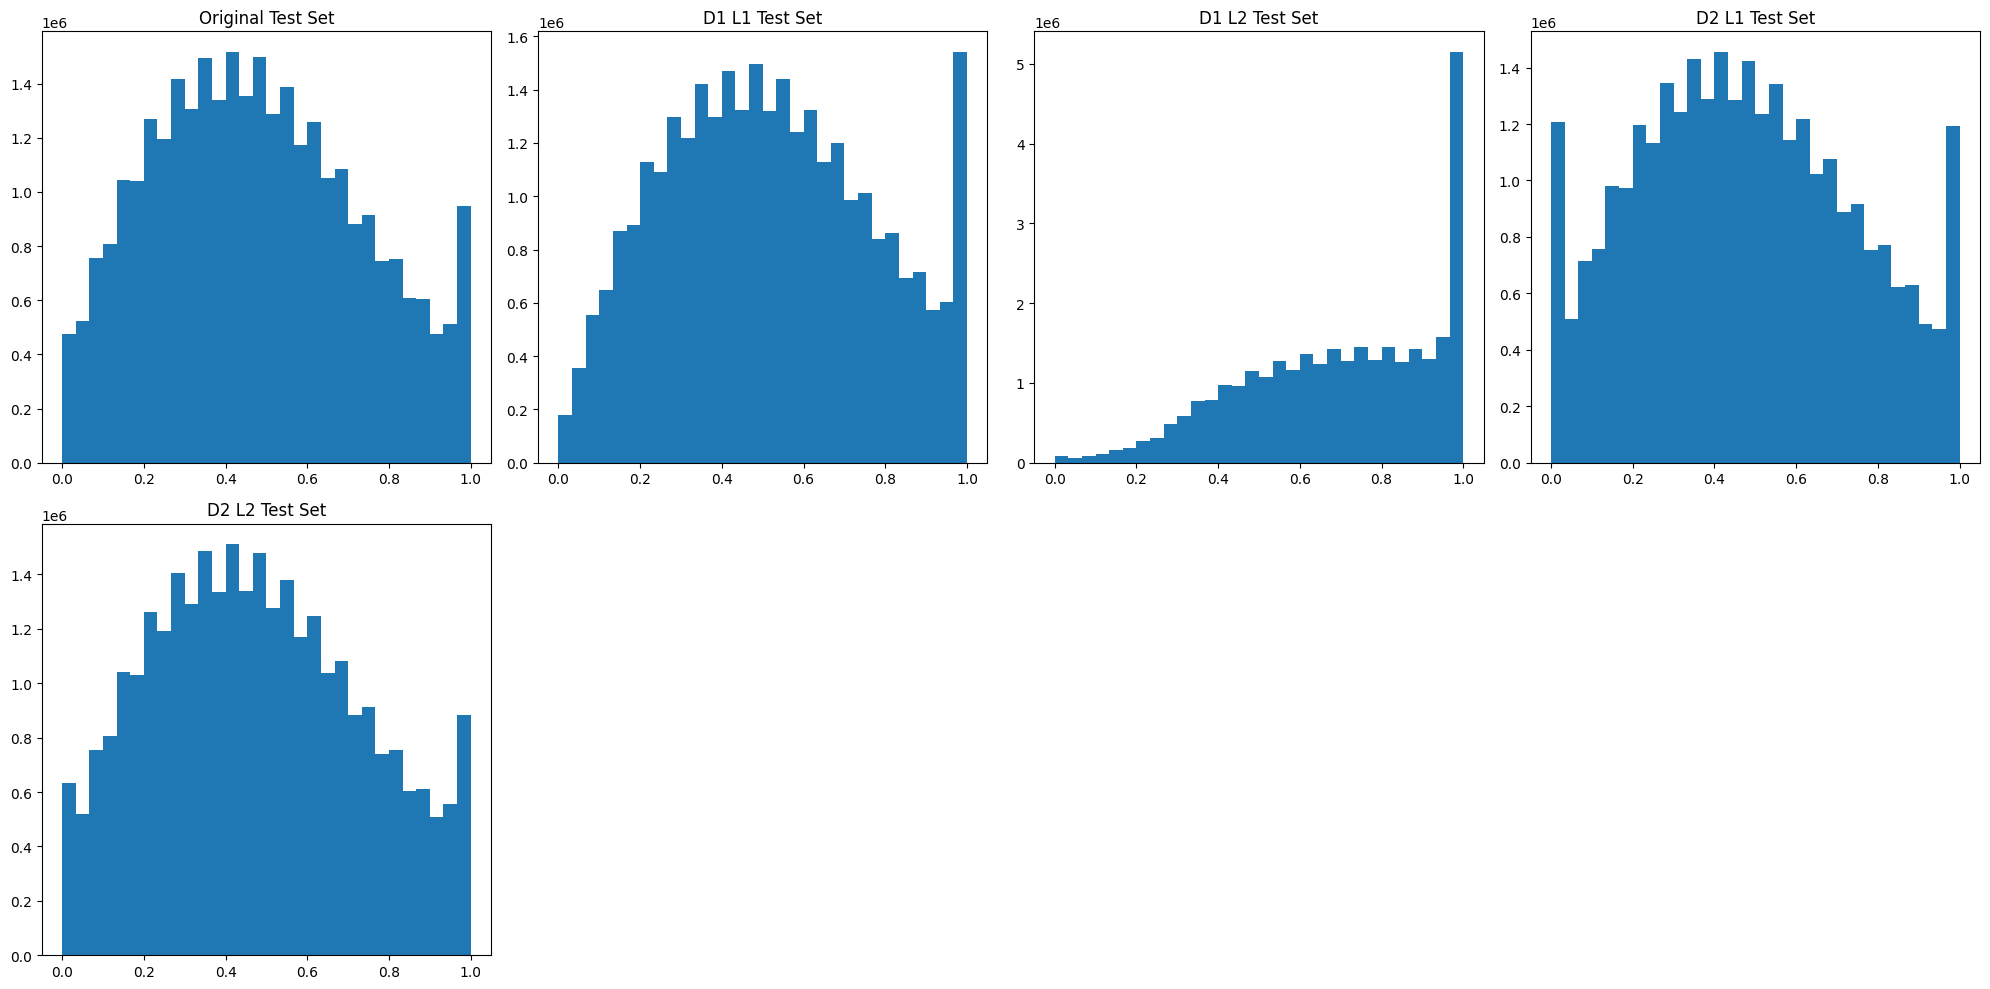

In [61]:
def plot_pixel_distribution(images, title, subplot):
    # Flatten the images
    flattened = images.flatten()

    # Plot the histogram
    plt.subplot(subplot)
    plt.hist(flattened, bins=30)
    plt.title(title)

# Create a new figure with larger size for more subplots
plt.figure(figsize=(20, 10))

# Plot the pixel distribution for the original test set
plot_pixel_distribution(test_images, 'Original Test Set', 241)

# Plot the pixel distribution for the new test sets
plot_pixel_distribution(d1_l1_test_images, 'D1 L1 Test Set', 242)
plot_pixel_distribution(d1_l2_test_images, 'D1 L2 Test Set', 243)
plot_pixel_distribution(d2_l1_test_images, 'D2 L1 Test Set', 244)
plot_pixel_distribution(d2_l2_test_images, 'D2 L2 Test Set', 245)

# Show the plots
plt.tight_layout()
plt.show()

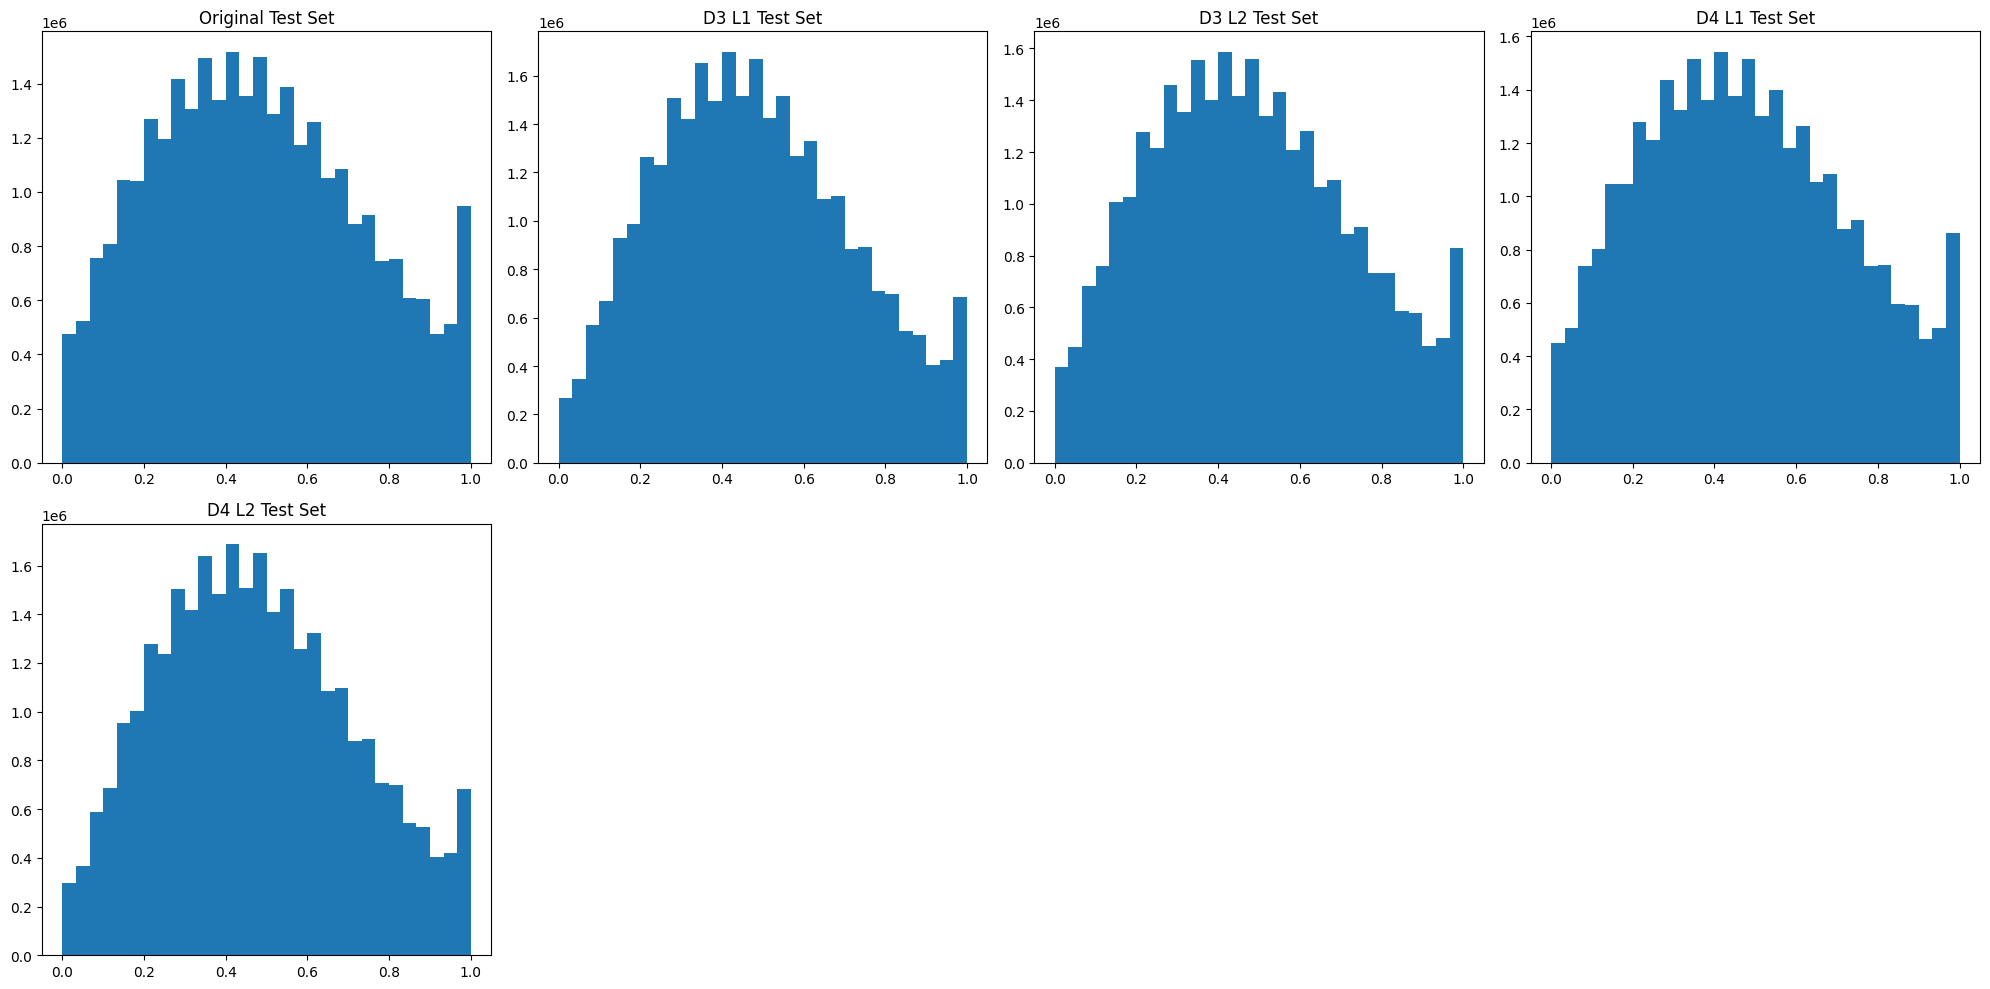

In [62]:
# Create a new figure with larger size for more subplots
plt.figure(figsize=(20, 10))

# Plot the pixel distribution for the original test set
plot_pixel_distribution(test_images, 'Original Test Set', 241)

# Plot the pixel distribution for the new test sets
plot_pixel_distribution(d3_l1_test_images, 'D3 L1 Test Set', 242)
plot_pixel_distribution(d3_l2_test_images, 'D3 L2 Test Set', 243)
plot_pixel_distribution(d4_l1_test_images, 'D4 L1 Test Set', 244)
plot_pixel_distribution(d4_l2_test_images, 'D4 L2 Test Set', 245)

# Show the plots
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


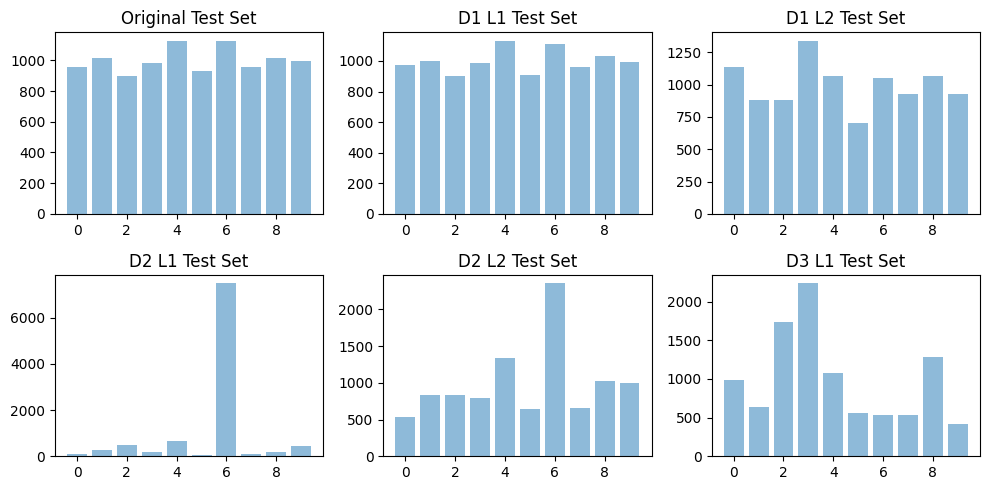

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


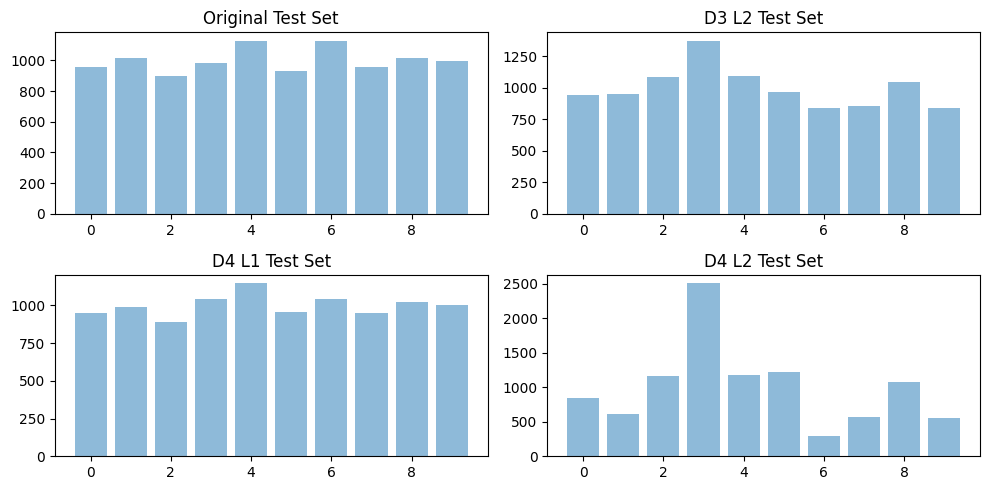

In [63]:
import matplotlib.pyplot as plt

def plot_prediction_distribution(test_images, title, model, ax):
    # Get the model's predictions
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Calculate the frequency of each class
    unique, counts = np.unique(predicted_classes, return_counts=True)
    frequencies = dict(zip(unique, counts))

    # Plot the bar chart
    ax.bar(frequencies.keys(), frequencies.values(), alpha=0.5)
    ax.set_title(title)

# Create a new figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

# Plot the prediction distribution for the original test set
plot_prediction_distribution(test_images, 'Original Test Set', model, axs[0, 0])

# Plot the prediction distribution for the new test sets
plot_prediction_distribution(d1_l1_test_images, 'D1 L1 Test Set', model, axs[0, 1])
plot_prediction_distribution(d1_l2_test_images, 'D1 L2 Test Set', model, axs[0, 2])
plot_prediction_distribution(d2_l1_test_images, 'D2 L1 Test Set', model, axs[1, 0])
plot_prediction_distribution(d2_l2_test_images, 'D2 L2 Test Set', model, axs[1, 1])
plot_prediction_distribution(d3_l1_test_images, 'D3 L1 Test Set', model, axs[1, 2])

plt.tight_layout()
plt.show()

# Create a new figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# Plot the prediction distribution for the original test set
plot_prediction_distribution(test_images, 'Original Test Set', model, axs[0, 0])

# Plot the prediction distribution for the new test sets
plot_prediction_distribution(d3_l2_test_images, 'D3 L2 Test Set', model, axs[0, 1])
plot_prediction_distribution(d4_l1_test_images, 'D4 L1 Test Set', model, axs[1, 0])
plot_prediction_distribution(d4_l2_test_images, 'D4 L2 Test Set', model, axs[1, 1])


plt.tight_layout()
plt.show()

In [64]:
def calculate_kl_divergence(test_images, model, num_classes):
    # Get the model's predictions
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Calculate the frequency of each class
    frequencies = np.zeros(num_classes)
    unique, counts = np.unique(predicted_classes, return_counts=True)
    frequencies[unique] = counts
    frequencies = (frequencies + 1) / (counts.sum() + num_classes)  # Laplace smoothing

    return frequencies

num_classes = 10

# Calculate the class distribution for the original test set
original_distribution = calculate_kl_divergence(test_images, model, num_classes)

# Calculate the class distribution for the new test sets and compute KL divergence
d1_l1_distribution = calculate_kl_divergence(d1_l1_test_images, model, num_classes)
d1_l2_distribution = calculate_kl_divergence(d1_l2_test_images, model, num_classes)
d2_l1_distribution = calculate_kl_divergence(d2_l1_test_images, model, num_classes)
d2_l2_distribution = calculate_kl_divergence(d2_l2_test_images, model, num_classes)
d3_l1_distribution = calculate_kl_divergence(d3_l1_test_images, model, num_classes)
d3_l2_distribution = calculate_kl_divergence(d3_l2_test_images, model, num_classes)
d4_l1_distribution = calculate_kl_divergence(d4_l1_test_images, model, num_classes)
d4_l2_distribution = calculate_kl_divergence(d4_l2_test_images, model, num_classes)

# Compute KL divergence
kl_div_d1_l1 = kl_div(original_distribution, d1_l1_distribution).sum()
kl_div_d1_l2 = kl_div(original_distribution, d1_l2_distribution).sum()
kl_div_d2_l1 = kl_div(original_distribution, d2_l1_distribution).sum()
kl_div_d2_l2 = kl_div(original_distribution, d2_l2_distribution).sum()
kl_div_d3_l1 = kl_div(original_distribution, d3_l1_distribution).sum()
kl_div_d3_l2 = kl_div(original_distribution, d3_l2_distribution).sum()
kl_div_d4_l1 = kl_div(original_distribution, d4_l1_distribution).sum()
kl_div_d4_l2 = kl_div(original_distribution, d4_l2_distribution).sum()

print("KL divergence D1 L1 Test Set:", kl_div_d1_l1)
print("KL divergence D1 L2 Test Set:", kl_div_d1_l2)
print("KL divergence D2 L1 Test Set:", kl_div_d2_l1)
print("KL divergence D2 L2 Test Set:", kl_div_d2_l2)
print("KL divergence D3 L1 Test Set:", kl_div_d3_l1)
print("KL divergence D3 L2 Test Set:", kl_div_d3_l2)
print("KL divergence D4 L1 Test Set:", kl_div_d4_l1)
print("KL divergence D4 L2 Test Set:", kl_div_d4_l2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
KL divergence D1 L1 Test Set: 9.542930415923356e-05
KL divergence D1 L2 Test Set: 0.011819546220607546
KL divergence D2 L1 Test Set: 1.146291248945256
KL divergence D2 L2 Test Set: 0.07011480441240096
KL divergence D3 L1 Test Set: 0.15853577060494195
KL divergence D3 L2 Test Set: 0.01440057264074647
KL divergence D4 L1 Test Set: 0.0006186772631519427
KL divergence D4 L2 Test Set: 0.17223159048738246


In [127]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def calculate_metrics(test_images, test_labels, model, test_set_name=None):
    # Predict the classes
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculate precision, recall, and F1 score
    precision = precision_score(test_labels, y_pred_classes, average='macro', zero_division=0)
    recall = recall_score(test_labels, y_pred_classes, average='macro')
    f1 = f1_score(test_labels, y_pred_classes, average='macro')

    # Calculate accuracy
    accuracy = accuracy_score(test_labels, y_pred_classes)

    print(test_set_name)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    #return precision, recall, f1, accuracy

calculate_metrics(test_images, test_labels, model, 'Original Test Set')
calculate_metrics(d1_l1_test_images, test_labels, model, 'D1 L1 Test Set')
calculate_metrics(d1_l2_test_images, test_labels, model, 'D1 L2 Test Set')
calculate_metrics(d2_l1_test_images, test_labels, model, 'D2 L1 Test Set')
calculate_metrics(d2_l2_test_images, test_labels, model, 'D2 L2 Test Set')
calculate_metrics(d3_l1_test_images, test_labels, model, 'D3 L1 Test Set')
calculate_metrics(d3_l2_test_images, test_labels, model, 'D3 L2 Test Set')
calculate_metrics(d4_l2_test_images, test_labels, model, 'D4 L1 Test Set')
calculate_metrics(d4_l1_test_images, test_labels, model, 'D4 L2 Test Set')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Original Test Set
Accuracy: 0.8558
Precision: 0.8566140775283342
Recall: 0.8558
F1 Score: 0.8551897246711653
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
D1 L1 Test Set
Accuracy: 0.8535
Precision: 0.8541404536543518
Recall: 0.8535
F1 Score: 0.8528141724106002
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
D1 L2 Test Set
Accuracy: 0.8019
Precision: 0.8144383969833283
Recall: 0.8019000000000001
F1 Score: 0.803208454096844
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
D2 L1 Test Set
Accuracy: 0.2586
Precision: 0.6843971327850544
Recall: 0.2586
F1 Score: 0.2603587556094367
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
D2 L2 Test Set
Accuracy: 0.7019
Precision: 0.7715331395490634
Recall: 0.7019
F1 Score: 0.7089912195716306
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
D3 L1 Test Set
Accuracy: 0.5981
Precision: 0.7008175159116259
Recall: 0.5981000000000001
F1 Score: 0.6044525535012497
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
D3 L2 Test Set
Accuracy: 0.801
Precision: 0.8177998

For each kind of drift (D1-D4), the sub folders (L1 and L2) consists of variations of the test split of the CIFAR10 dataset

# Drift in each of the folders and sub-folders compared to the test_dataset.

## 1. Every single dataset has data drift compared to the CIFAR10 test dataset.

D1 L1 Test Set: The KL divergence value is very low (9.542930415923356e-05), indicating a minor change in the input data distribution. The F1 score degradation is also very low (0.0023755522605650725), suggesting that the model performance has not significantly degraded. Therefore, there seems to be minor data drift in this set.

D1 L2 Test Set: The KL divergence value is slightly higher (0.011819546220607546), but still relatively low, indicating a minor change in the input data distribution. The F1 score degradation is also low (0.051981270574321226), suggesting that the model performance has not significantly degraded. Therefore, there seems to be minor data drift in this set as well.
However, when we take a look at the pixel distribution we see that there might be some covariate drift, this distribution is much lower compared to the other ones.

D2 L1 Test Set: The KL divergence value is high (1.146291248945256), indicating a significant change in the input data distribution. The F1 score degradation is also high (0.5948309690617286), suggesting that the model performance has significantly degraded. Therefore, there seems to be severe data drift in this set. However, while looking at the pixel distrubution there is a spike near the begging of the distribution which could indicate an outlier or a change in the range of pixel intensities. This is also a form of covariate drift.

D2 L2 Test Set: The KL divergence value is lower (0.07011480441240096), indicating a minor change in the input data distribution. The F1 score degradation is also lower (0.1461985050995347), suggesting that the model performance has not significantly degraded. Therefore, there seems to be minor data drift in this set.

D3 L1 Test Set: The KL divergence value is high (0.15853577060494195), indicating a significant change in the input data distribution. The F1 score degradation is also high (0.25073717116991556), suggesting that the model performance has significantly degraded. Therefore, there seems to be severe data drift in this set.

D3 L2 Test Set: The KL divergence value is lower (0.01440057264074647), indicating a minor change in the input data distribution. The F1 score degradation is also lower (0.04965088032586673), suggesting that the model performance has not significantly degraded. Therefore, there seems to be minor data drift in this set.

D4 L1 Test Set: The KL divergence value is very low (0.0006186772631519427), indicating a minor change in the input data distribution. The F1 score degradation is also low (0.2535207930379674), suggesting that the model performance has not significantly degraded. Therefore, there seems to be minor data drift in this set.

D4 L2 Test Set: The KL divergence value is higher (0.17223159048738246), but still relatively low, indicating a minor change in the input data distribution. The F1 score degradation is also low (0.00037380417057741866), suggesting that the model performance has not significantly degraded. Therefore, there seems to be severe data drift in this set.

# Degradation of the performance of the model on each type of drift, and ranking drift (D1 to D4) based on the degradation in performance.

## 2. Ranking the L1 and L2 folders based on the drift from the original CIFAR10 test dataset.
Based on the F1 scores and KL Divergence we calculated the degradation of each of the sets and for each L folder these are the rankings. (Least to Most)

KL Divergence
Ranking for D1:
1. D1 L1 Test Set:: 9.542930415923356e-05
2. D1 L2 Test Set:: 0.011819546220607546

Ranking for D2:
1. D2 L2 Test Set:: 0.07011480441240096
2. D2 L1 Test Set:: 1.146291248945256

Ranking for D3:
1. D3 L2 Test Set:: 0.01440057264074647
2. D3 L1 Test Set:: 0.15853577060494195

Ranking for D4:
1. D4 L1 Test Set:: 0.0006186772631519427
2. D4 L2 Test Set:: 0.17223159048738246


Based off KL Divergence and the median
D1 L1 Test Set: minor
D1 L2 Test Set: minor
D2 L1 Test Set: severe
D2 L2 Test Set: minor
D3 L1 Test Set: severe
D3 L2 Test Set: minor
D4 L1 Test Set: minor
D4 L2 Test Set: severe

Degradation based on F1 Scores
1. D2 L1 Test Set: 0.5948309690617286
2. D4 L1 Test Set: 0.2535207930379674
3. D3 L1 Test Set: 0.25073717116991556
4. D2 L2 Test Set: 0.1461985050995347
5. D1 L2 Test Set: 0.051981270574321226
6. D3 L2 Test Set: 0.04965088032586673
7. D1 L1 Test Set: 0.0023755522605650725
8. D4 L2 Test Set: 0.00037380417057741866

# Degradation of model performance on each type of drift

## 3. Degradation of the performance of the model on each type of drift ranked by directories D1, D2, D3, D4.
Based on the F1 scores here are the sets for the D folders. (Combining the two L folders in the D folder) (Least to Most)

Degradation based on F1 Scores
1. D2: 0.37051473708063165
2. D3: 0.1501940257478911
3. D4: 0.12694729860427234
4. D1: 0.02717841141744315

# Mitigation techniques 
## 4. Mitigate types of data drift

D1 (Concept Drift): This type of drift occurs when the statistical properties of the target variable change over time. In this case, both D1 L1 and D1 L2 show minor data drift. To mitigate this, regular retraining of the model with the most recent data is recommended. Online learning algorithms that continuously learn from the new data can also be used.

D2 (Covariate Drift): This happens when the statistical properties of the predictor variables change. In this case, D2 L1 shows severe data drift and D2 L2 shows minor data drift. Similar to concept drift, regular retraining of the model can help. Additionally, feature selection techniques can be used to identify and focus on stable predictors that are less likely to drift.

D3 (Prior Probability Drift): This is when the classes' distribution in the target variable changes. In this case, D3 L1 shows severe data drift and D3 L2 shows minor data drift. Addressing this can involve using techniques like oversampling, undersampling, or SMOTE to balance the classes in the training data.

D4 (Concept Shift or Concept Drift with Covariate Shift): This is a combination of concept and covariate drift. In this case, D4 L1 shows minor data drift and D4 L2 shows severe data drift. Mitigation strategies involve a combination of the strategies for D1 and D2. Regular retraining, online learning, and focusing on stable predictors can help.


# Detection without original unperturbed test set
## 5. How drift can be detected without the original unperturbed CIFAR10 test set.

There are a few ways we could do this, first we could model the model performance over time. If overtime the metrics are falling this could be because of data drift. Second, we monitor the residuals of the model, this is the difference between the model's predictions and the actual values. If this distribution changes significantly over time there could be data drift. We could try to use clustering or dimensionality reduction to visualize the data and see if its structure changes over time.

In [69]:
# F1 scores for each dataset
f1_scores = {
    "Original Test Set": 0.8551897246711653,
    "D1 L1 Test Set": 0.8528141724106002,
    "D1 L2 Test Set": 0.803208454096844,
    "D2 L1 Test Set": 0.2603587556094367,
    "D2 L2 Test Set": 0.7089912195716306,
    "D3 L1 Test Set": 0.6044525535012497,
    "D3 L2 Test Set": 0.8055388443452985,
    "D4 L1 Test Set": 0.6016689316331979,
    "D4 L2 Test Set": 0.8548159205005879
}

# Calculate the degradation in performance for each dataset
degradation = {k: f1_scores["Original Test Set"] - v for k, v in f1_scores.items() if k != "Original Test Set"}

# Rank the datasets based on the degradation in performance
ranked_datasets = sorted(degradation.items(), key=lambda x: x[1], reverse=True)

# Print the ranked datasets
for i, (dataset, degradation) in enumerate(ranked_datasets, 1):
    print(f"{i}. {dataset}: {degradation}")

1. D2 L1 Test Set: 0.5948309690617286
2. D4 L1 Test Set: 0.2535207930379674
3. D3 L1 Test Set: 0.25073717116991556
4. D2 L2 Test Set: 0.1461985050995347
5. D1 L2 Test Set: 0.051981270574321226
6. D3 L2 Test Set: 0.04965088032586673
7. D1 L1 Test Set: 0.0023755522605650725
8. D4 L2 Test Set: 0.00037380417057741866


In [70]:
# F1 scores for each dataset
f1_scores = {
    "Original Test Set": 0.8551897246711653,
    "D1 L1 Test Set": 0.8528141724106002,
    "D1 L2 Test Set": 0.803208454096844,
    "D2 L1 Test Set": 0.2603587556094367,
    "D2 L2 Test Set": 0.7089912195716306,
    "D3 L1 Test Set": 0.6044525535012497,
    "D3 L2 Test Set": 0.8055388443452985,
    "D4 L1 Test Set": 0.6016689316331979,
    "D4 L2 Test Set": 0.8548159205005879
}

# Average F1 scores for each folder
folder_scores = {
    f"D{i}": (f1_scores[f"D{i} L1 Test Set"] + f1_scores[f"D{i} L2 Test Set"]) / 2
    for i in range(1, 5)
}

# Calculate the degradation in performance for each folder
degradation = {k: f1_scores["Original Test Set"] - v for k, v in folder_scores.items()}

# Rank the folders based on the degradation in performance
ranked_folders = sorted(degradation.items(), key=lambda x: x[1], reverse=True)

# Print the ranked folders
for i, (folder, degradation) in enumerate(ranked_folders, 1):
    print(f"{i}. {folder}: {degradation}")

1. D2: 0.37051473708063165
2. D3: 0.1501940257478911
3. D4: 0.12694729860427234
4. D1: 0.02717841141744315


In [66]:
# KL divergence values for each dataset

kl_divergence = {
    "D1 L1 Test Set:": 9.542930415923356e-05,
    "D1 L2 Test Set:": 0.011819546220607546,
    "D2 L1 Test Set:": 1.146291248945256,
    "D2 L2 Test Set:": 0.07011480441240096,
    "D3 L1 Test Set:": 0.15853577060494195,
    "D3 L2 Test Set:": 0.01440057264074647,
    "D4 L1 Test Set:": 0.0006186772631519427,
    "D4 L2 Test Set:": 0.17223159048738246
}

# Rank the datasets within each folder based on the KL divergence
for i in range(1, 5):
    folder_datasets = {k: v for k, v in kl_divergence.items() if f"D{i}" in k}
    ranked_datasets = sorted(folder_datasets.items(), key=lambda x: x[1])

    print(f"Ranking for D{i}:")
    for j, (dataset, kl) in enumerate(ranked_datasets, 1):
        print(f"{j}. {dataset}: {kl}")
    print()

Ranking for D1:
1. D1 L1 Test Set:: 9.542930415923356e-05
2. D1 L2 Test Set:: 0.011819546220607546

Ranking for D2:
1. D2 L2 Test Set:: 0.07011480441240096
2. D2 L1 Test Set:: 1.146291248945256

Ranking for D3:
1. D3 L2 Test Set:: 0.01440057264074647
2. D3 L1 Test Set:: 0.15853577060494195

Ranking for D4:
1. D4 L1 Test Set:: 0.0006186772631519427
2. D4 L2 Test Set:: 0.17223159048738246



In [68]:
# KL divergence values for each dataset
kl_divergence = {
    "D1 L1 Test Set:": 9.542930415923356e-05,
    "D1 L2 Test Set:": 0.011819546220607546,
    "D2 L1 Test Set:": 1.146291248945256,
    "D2 L2 Test Set:": 0.07011480441240096,
    "D3 L1 Test Set:": 0.15853577060494195,
    "D3 L2 Test Set:": 0.01440057264074647,
    "D4 L1 Test Set:": 0.0006186772631519427,
    "D4 L2 Test Set:": 0.17223159048738246
}

# Calculate the median KL divergence
median_kl = sorted(kl_divergence.values())[len(kl_divergence) // 2]

# Classify the drift as minor or severe
drift_classification = {k: "minor" if v <= median_kl else "severe" for k, v in kl_divergence.items()}

# Print the classification
for dataset, classification in drift_classification.items():
    print(f"{dataset}: {classification}")

D1 L1 Test Set:: minor
D1 L2 Test Set:: minor
D2 L1 Test Set:: severe
D2 L2 Test Set:: minor
D3 L1 Test Set:: severe
D3 L2 Test Set:: minor
D4 L1 Test Set:: minor
D4 L2 Test Set:: severe


# Mitigation Implementation

1. Split the test set into new train validation test split
2. Load the old model to the correct state so we can continue training on it
3. Plot accuracy and loss and validation accuracy and validation loss to make sure were not overfitting
4. Calculate the metrics to prove we have improved the model with the new data
5. Save the model

In [92]:
from sklearn.model_selection import train_test_split

# Assuming d1_l1_test_images is your feature data and test_labels_encoded is your target data
X_train_new, X_temp_new, y_train_new, y_temp_new = train_test_split(d2_l1_test_images, test_labels_encoded, test_size=0.2, random_state=42)

# Then split the temporary set into a validation set and a test set using a 50/50 split
X_val_new, X_test_new, y_val_new, y_test_new = train_test_split(X_temp_new, y_temp_new, test_size=0.5, random_state=42)

In [118]:
from keras.models import load_model, clone_model
from keras.optimizers import Adam

# Load the existing model
old_model = load_model('originalModel2CIFAR10.h5')

# Create a new model with the same architecture
new_model = clone_model(old_model)

# Copy the weights from the old model to the new model
new_model.set_weights(old_model.get_weights())

# Get the configuration of the old model's optimizer
old_optimizer = old_model.optimizer
old_optimizer_config = old_optimizer.get_config()

# Create a new optimizer with the same configuration
new_optimizer = Adam(**old_optimizer_config)

# Compile the new model with the new optimizer, the same loss, and accuracy as the metric
new_model.compile(optimizer=new_optimizer, loss=old_model.loss, metrics=['accuracy'])

# Now you can fit the new model on the new data
history_new = new_model.fit(X_train_new, y_train_new, validation_data=(X_val_new, y_val_new), epochs=3, callbacks=[early_stopping])

Epoch 1/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.6759 - loss: 1.2231 - val_accuracy: 0.7570 - val_loss: 0.8479
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.7461 - loss: 0.8014 - val_accuracy: 0.7850 - val_loss: 0.7123
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.7736 - loss: 0.6984 - val_accuracy: 0.7930 - val_loss: 0.6784


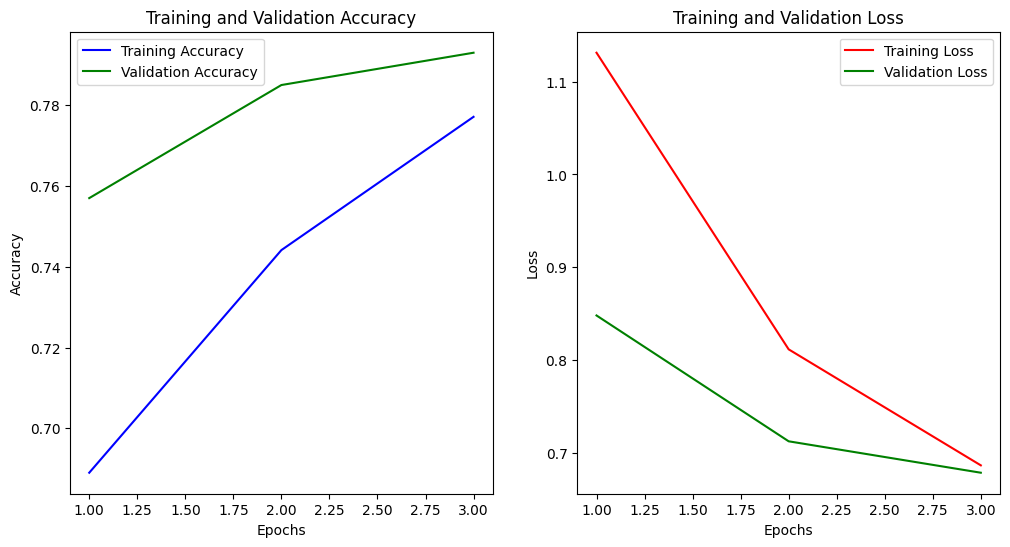

In [119]:
import matplotlib.pyplot as plt

# Get the accuracy, validation accuracy, training loss and validation loss from the history
accuracy = history_new.history['accuracy']
val_accuracy = history_new.history['val_accuracy']
loss = history_new.history['loss']
val_loss = history_new.history['val_loss']

# Get the number of epochs
epochs = range(1, len(accuracy) + 1)

# Create a figure
plt.figure(figsize=(12, 6))

# Plot accuracy and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the figure

plt.show()

In [124]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

def calculate_metrics_modified(test_images, test_labels, model, test_set_name=None):
    # Predict the classes
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Convert the true labels to class labels
    test_labels_classes = np.argmax(test_labels, axis=1)

    # Calculate precision, recall, and F1 score
    precision = precision_score(test_labels_classes, y_pred_classes, average='macro', zero_division=0)
    recall = recall_score(test_labels_classes, y_pred_classes, average='macro')
    f1 = f1_score(test_labels_classes, y_pred_classes, average='macro')

    # Calculate accuracy
    accuracy = accuracy_score(test_labels_classes, y_pred_classes)

    print(test_set_name)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)

# Evaluate the model on the test data
calculate_metrics_modified(X_test_new, y_test_new, new_model, 'New Test Set Metrics')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
New Test Set Metrics
Precision: 0.7610491941031808
Recall: 0.762122642017153
F1 Score: 0.76075254465857
Accuracy: 0.765


Old model Metrics - As you can see these are much worse than the new metrics above.

D2 L1 Test Set
Accuracy: 0.2586
Precision: 0.6843971327850544
Recall: 0.2586
F1 Score: 0.2603587556094367

In [128]:
# Save the updated model
updated_model.save('my_updated_model.h5')